# 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import MinMaxScaler #for normalising data prior to clustering
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\astat\Documents\Final project'

In [4]:
#Import data
crime_police = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'crime_police_cleaned3.pkl'))

In [5]:
crime_police.head()

,Staff_area_name,crime_area,Geo_boundries_Data_match,number_residents,number_police,year,police_per_1000,number_spc,id,date,...,crime_type,outcome_cat,month,number_crimes,crime_per_officer,crime_per_residents,crime,area_size,pop_density,urban
0,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,0,2020-01,...,14,24.0,1,27252,5.099551,11.683601,Violence & damage,2029.0,1149.581074,0
1,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,1,2020-01,...,8,10.0,1,27252,5.099551,11.683601,Weapons & Drugs,2029.0,1149.581074,0
2,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,2,2020-01,...,2,10.0,1,27252,5.099551,11.683601,Theft,2029.0,1149.581074,0
3,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,3,2020-01,...,3,10.0,1,27252,5.099551,11.683601,Theft,2029.0,1149.581074,0
4,West Yorkshire,37,E23000010,2332500.0,5344.0,2020,2.300781,271.0,4,2020-01,...,4,10.0,1,27252,5.099551,11.683601,Violence & damage,2029.0,1149.581074,0


In [6]:
crime_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18362528 entries, 0 to 7893406
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Staff_area_name           object 
 1   crime_area                int8   
 2   Geo_boundries_Data_match  object 
 3   number_residents          float32
 4   number_police             float16
 5   year                      int16  
 6   police_per_1000           float16
 7   number_spc                float16
 8   id                        int32  
 9   date                      object 
 10  reported                  int8   
 11  lsoa_code                 object 
 12  lsoa_name                 object 
 13  crime_type                int8   
 14  outcome_cat               float16
 15  month                     int8   
 16  number_crimes             int32  
 17  crime_per_officer         float32
 18  crime_per_residents       float32
 19  crime                     object 
 20  area_size              

# 02. Tidy data

In [7]:
#create subset without categorical variables
crime_police_cluster = crime_police[['number_residents', 
                                     'number_police',  
                                     'number_spc', 
                                     'police_per_1000', 
                                     'number_crimes', 
                                     'crime_per_officer', 
                                     'crime_per_residents', 
                                     'area_size',
                                     'pop_density']]

In [8]:
crime_police_cluster.head()

,number_residents,number_police,number_spc,police_per_1000,number_crimes,crime_per_officer,crime_per_residents,area_size,pop_density
0,2332500.0,5344.0,271.0,2.300781,27252,5.099551,11.683601,2029.0,1149.581074
1,2332500.0,5344.0,271.0,2.300781,27252,5.099551,11.683601,2029.0,1149.581074
2,2332500.0,5344.0,271.0,2.300781,27252,5.099551,11.683601,2029.0,1149.581074
3,2332500.0,5344.0,271.0,2.300781,27252,5.099551,11.683601,2029.0,1149.581074
4,2332500.0,5344.0,271.0,2.300781,27252,5.099551,11.683601,2029.0,1149.581074


In [9]:
#remove scientific notation of desc output
pd.options.display.float_format = '{:.2f}'.format

In [10]:
crime_police_cluster.describe()

,number_residents,number_police,number_spc,police_per_1000,number_crimes,crime_per_officer,crime_per_residents,area_size,pop_density
count,18362528.00,18362528.00,18339972.00,18362528.00,18362528.00,18362528.00,18362528.00,18362528.00,18362528.00
mean,2644639.25,NaN,NaN,NaN,28503.77,4.54,9.70,3075.64,1629.20
std,2888569.25,NaN,NaN,0.00,31957.19,1.09,3.39,2117.92,2041.22
min,8000.00,782.00,40.00,1.40,226.00,0.29,3.89,2.60,47.35
25%,1100300.00,1928.00,152.00,1.70,8697.00,3.67,7.95,1578.00,359.85
50%,1712100.00,3000.00,240.00,2.00,14994.00,4.47,9.39,2364.00,503.19
75%,2420000.00,5580.00,358.00,2.30,27015.00,5.32,10.66,3783.00,2216.90
max,8962000.00,33792.00,2140.00,97.75,114008.00,8.55,116.62,10976.00,5679.34


#### Normalising data

In [11]:
#setting scaler
scaler = MinMaxScaler()

In [12]:
#crime_police_scaled = scaler.fit_transform(crime_police_cluster) #creates array and no df

In [12]:
#scaling
crime_police_cluster[['number_residents', 
                     'number_police',  
                     'number_spc', 
                     'police_per_1000', 
                     'number_crimes', 
                     'crime_per_officer', 
                     'crime_per_residents', 
                     'area_size',
                     'pop_density']] = scaler.fit_transform(crime_police_cluster[['number_residents', 
                                                                                              'number_police',  
                                                                                              'number_spc', 
                                                                                              'police_per_1000', 
                                                                                              'number_crimes', 
                                                                                              'crime_per_officer', 
                                                                                              'crime_per_residents', 
                                                                                              'area_size',
                                                                                              'pop_density']])

C:\Users\astat\AppData\Local\Temp\ipykernel_11876\3978958063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_police_cluster[['number_residents',


In [13]:
#checking scaling
crime_police_cluster.head()

,number_residents,number_police,number_spc,police_per_1000,number_crimes,crime_per_officer,crime_per_residents,area_size,pop_density
0,0.26,0.14,0.11,0.01,0.24,0.58,0.07,0.18,0.20
1,0.26,0.14,0.11,0.01,0.24,0.58,0.07,0.18,0.20
2,0.26,0.14,0.11,0.01,0.24,0.58,0.07,0.18,0.20
3,0.26,0.14,0.11,0.01,0.24,0.58,0.07,0.18,0.20
4,0.26,0.14,0.11,0.01,0.24,0.58,0.07,0.18,0.20


In [14]:
crime_police_cluster.describe()

,number_residents,number_police,number_spc,police_per_1000,number_crimes,crime_per_officer,crime_per_residents,area_size,pop_density
count,18362528.00,18362528.00,18339972.00,18362528.00,18362528.00,18362528.00,18362528.00,18362528.00,18362528.00
mean,0.32,0.23,0.24,0.01,0.25,0.51,0.05,0.28,0.28
std,0.33,0.35,0.32,0.04,0.28,0.14,0.03,0.19,0.36
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.12,0.03,0.05,0.00,0.07,0.41,0.04,0.14,0.06
50%,0.19,0.07,0.10,0.01,0.13,0.51,0.05,0.22,0.08
75%,0.27,0.15,0.15,0.01,0.24,0.61,0.06,0.34,0.39
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [15]:
#Check for missing values
crime_police_cluster.isnull().sum()

number_residents           0
number_police              0
number_spc             22556
police_per_1000            0
number_crimes              0
crime_per_officer          0
crime_per_residents        0
area_size                  0
pop_density                0
dtype: int64

In [18]:
#Drop entries with missing observations in number_spc as they link to City of London which is an outlier in ratio variables.
#crime_police_cluster = crime_police_cluster.dropna(inplace = True)
#crime_police_cluster=crime_police_cluster.dropna(subset = ['number_spc', inplace = True)
crime_police_scaled = crime_police_cluster[crime_police_cluster['number_spc'].isnull() == False]                                                          

In [19]:
crime_police_scaled.shape

(18339972, 9)

In [20]:
crime_police_scaled.describe()

,number_residents,number_police,number_spc,police_per_1000,number_crimes,crime_per_officer,crime_per_residents,area_size,pop_density
count,18339972.00,18339972.00,18339972.00,18339972.00,18339972.00,18339972.00,18339972.00,18339972.00,18339972.00
mean,0.32,0.23,0.24,0.01,0.25,0.51,0.05,0.28,0.28
std,0.33,0.35,0.32,0.01,0.28,0.13,0.02,0.19,0.36
min,0.05,0.00,0.00,0.00,0.02,0.22,0.00,0.05,0.00
25%,0.12,0.03,0.05,0.00,0.07,0.41,0.04,0.14,0.06
50%,0.19,0.07,0.10,0.01,0.13,0.51,0.05,0.22,0.08
75%,0.27,0.15,0.15,0.01,0.24,0.61,0.06,0.34,0.39
max,1.00,1.00,1.00,0.02,1.00,1.00,0.12,1.00,1.00


In [21]:
crime_police_scaled.isnull().sum()

number_residents       0
number_police          0
number_spc             0
police_per_1000        0
number_crimes          0
crime_per_officer      0
crime_per_residents    0
area_size              0
pop_density            0
dtype: int64

# 03. Elbow

In [22]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [ ]:
max_n_clusters = 10 kmeans = 
[KMeans(n_clusters=i) for i in range(1,max_n_clusters)] score = 
[kmeans[i].fit(crime_police_scaled).score(crime_police_scaled) for i in range(max_n_clusters-1)]

In [24]:
score = [kmeans[i].fit(crime_police_scaled).score(crime_police_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-11029181.989288198,
 -1293516.3045309174,
 -843256.5155850779,
 -541688.4397727747,
 -438688.865577468,
 -358401.2470223325,
 -306542.77013739856,
 -262410.70064505213,
 -236967.8219182342]

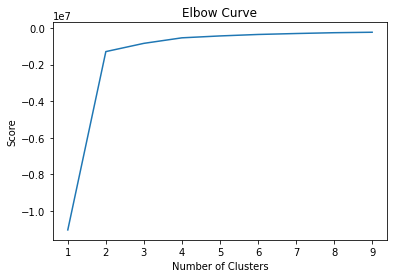

In [25]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will be using 4 clusters as the curve flattens further from 4 onwards.

# 04. k-Clustering

In [26]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 


In [27]:
# Fit the k-means object to the data.

kmeans.fit(crime_police_scaled)

KMeans(n_clusters=4)

In [28]:
crime_police_scaled['clusters'] = kmeans.fit_predict(crime_police_scaled)

C:\Users\astat\AppData\Local\Temp\ipykernel_11876\517347795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_police_scaled['clusters'] = kmeans.fit_predict(crime_police_scaled)


In [29]:
crime_police_scaled.head()

,number_residents,number_police,number_spc,police_per_1000,number_crimes,crime_per_officer,crime_per_residents,area_size,pop_density,clusters
0,0.26,0.14,0.11,0.01,0.24,0.58,0.07,0.18,0.20,2
1,0.26,0.14,0.11,0.01,0.24,0.58,0.07,0.18,0.20,2
2,0.26,0.14,0.11,0.01,0.24,0.58,0.07,0.18,0.20,2
3,0.26,0.14,0.11,0.01,0.24,0.58,0.07,0.18,0.20,2
4,0.26,0.14,0.11,0.01,0.24,0.58,0.07,0.18,0.20,2


In [30]:
crime_police_scaled['clusters'].value_counts()

2    10242782
1     3371292
0     3135975
3     1589923
Name: clusters, dtype: int64

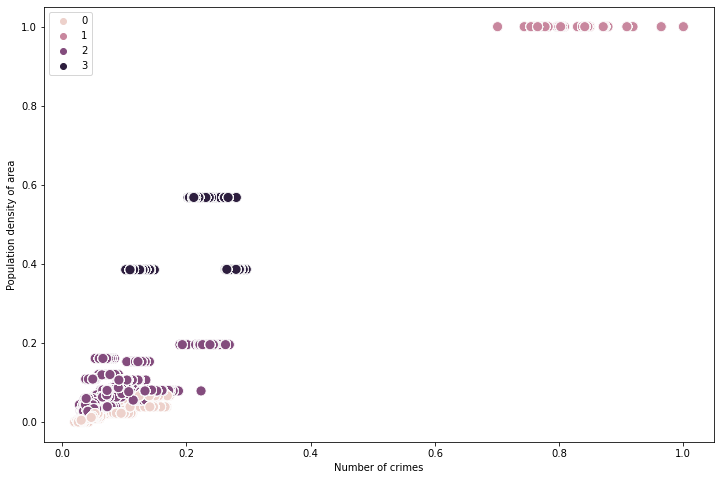

In [31]:
# Plot the clusters for the "number_crimes" and "pop_density" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=crime_police_scaled['number_crimes'], y=crime_police_scaled['pop_density'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of crimes') # Label x-axis.
plt.ylabel('Population density of area') # Label y-axis.
plt.show()

Cluster 1 shows London as the area with the highest population density and number of crimes. For the most rural cluster 0 there is a slight upward trend between population density and number of crimes, which is less obvious in other clusters, especially 1 and 3 which represent specific cities each and have therefore are stable level of population density.

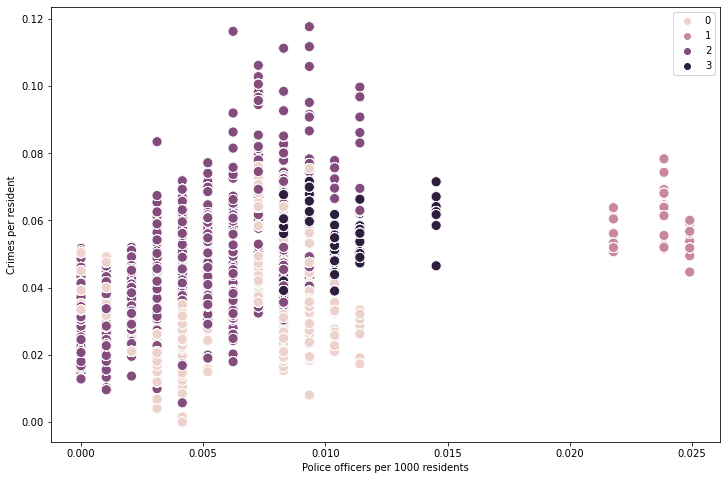

In [32]:
# Plot the clusters for the "police_per_1000" and "crime_per_residents" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=crime_police_scaled['police_per_1000'], y=crime_police_scaled['crime_per_residents'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Police officers per 1000 residents') 
plt.ylabel('Crimes per resident') 
plt.show()

Clusters 2 shows an overall positive trend, where crimes per residents increase with the rate of officers per residents. In clusters 1 and 3 this is not apparent. Cluster 0 instead seems to follow a sinusoidal trend.

In [33]:
crime_police_scaled.loc[crime_police_scaled['clusters'] == 3, 'cluster'] = 'black'
crime_police_scaled.loc[crime_police_scaled['clusters'] == 2, 'cluster'] = 'dark purple'
crime_police_scaled.loc[crime_police_scaled['clusters'] == 1, 'cluster'] = 'purple'
crime_police_scaled.loc[crime_police_scaled['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\astat\AppData\Local\Temp\ipykernel_11876\2398092249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_police_scaled.loc[crime_police_scaled['clusters'] == 3, 'cluster'] = 'black'


In [34]:
crime_police_scaled.groupby('cluster').agg({'number_crimes':['mean', 'median'], 
                                            'pop_density':['mean', 'median'], 
                                            'police_per_1000':['mean', 'median'],
                                            'crime_per_residents':['mean', 'median']})

number_crimes        pop_density        police_per_1000         \
                     mean median        mean median            mean median   
cluster                                                                      
black                0.21   0.22        0.48   0.39            0.01   0.01   
dark purple          0.11   0.10        0.09   0.08            0.00   0.00   
pink                 0.10   0.09        0.03   0.02            0.00   0.00   
purple               0.83   0.81        1.00   1.00            0.02   0.02   

            crime_per_residents         
                           mean median  
cluster                                 
black                      0.05   0.05  
dark purple                0.05   0.05  
pink                       0.04   0.03  
purple                     0.06   0.06

The purple cluster has the highest level of crimes and police, followed by black which still covers urban areas but has a similar rate of crimes per residents as dark purple. Overall number of crimes between dark purple and pink is at a similar level, despite their differences in population density.

#### Future steps
These results can be used as a starting off point for further analysis, where the make-up of the different clusters is further investigated. 
It also showed that although population density does affect overall levels of crime in an area, it is not solely reliant on this, as for some clusters it clearly showed a stable population density with varying numbers of crimes, which could be due to a time component to be investigated in a time series analysis.